In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from finta import TA
import mplfinance as mpf
from pandas_datareader import data as web
import yfinance as yf
from datetime import datetime

%matplotlib notebook

In [ ]:
def stock_data(symbol, data_set):
    end_date = datetime.now()
    start_date = datetime(2003, 1, 1)
    stock = yf.Ticker(symbol)
    df = stock.history(start=start_date, end=end_date, auto_adjust=True)
    hist_close = df[["Close"]]
    print(df)
    hist_close.rename(columns={"Close": symbol+"_close"}, inplace = True)
    hist_close.index.names = ['date']
    dataset = pd.merge(data_set, hist_close, on=["date"])
    return dataset

In [ ]:
def add_stock_data(symbol, data_set):
    end_date = datetime.now()
    start_date = datetime(2003, 1, 1)
    stock = yf.Ticker(symbol)
    df = stock.history(start=start_date, end=end_date, auto_adjust=True)
    hist_close = df[["Close"]]
    print(df)
    hist_close.rename(columns={"Close": symbol+"_close"}, inplace = True)
    hist_close.index.names = ['date']
    dataset = pd.merge(data_set, hist_close, on=["date"])
    return dataset

In [2]:
df = pd.read_csv('./data/MSFT_daily.csv',header=0, index_col="date", parse_dates=True)

df = df.iloc[::-1]


<IPython.core.display.Javascript object>


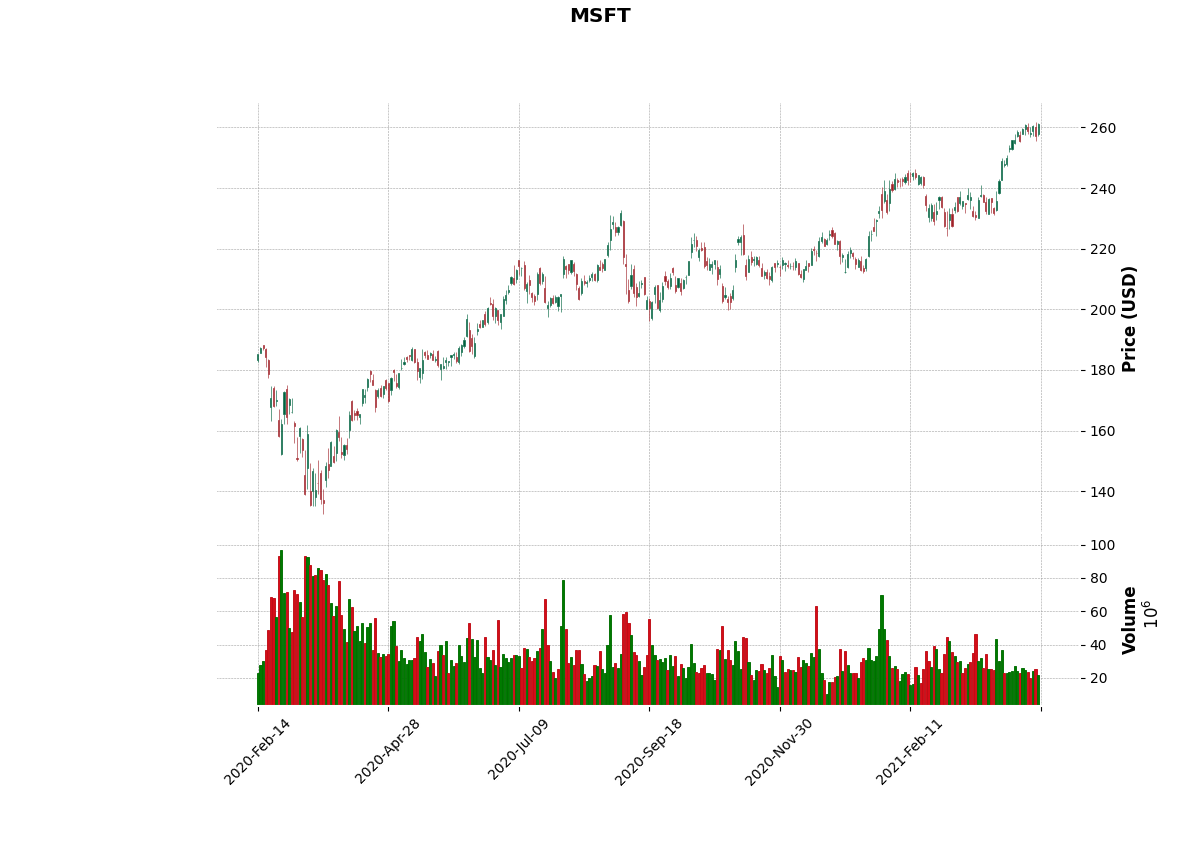

In [3]:
df.columns = ["open", "high", "low", "close", "volume"]
#df = df.iloc[::-1]

mpf.plot(df.tail(300), type='candle', style='charles',
        title='MSFT',
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        )

In [4]:
df.dtypes
#df['Datetime'] = pd.to_datetime(df['Date'], format="%Y/%m/%d")

open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object

<IPython.core.display.Javascript object>


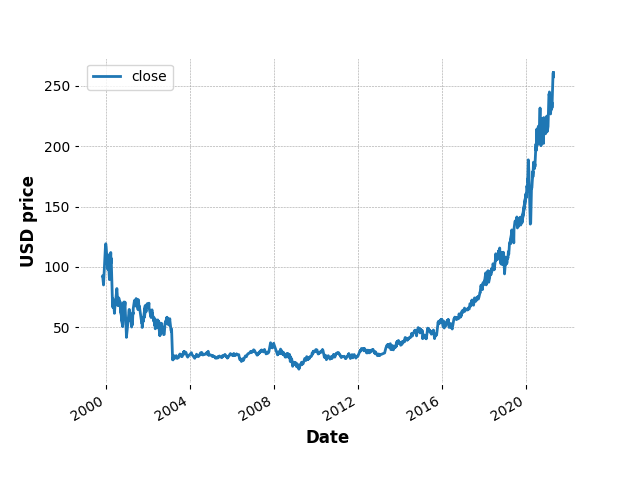

Text(0.5, 0, 'Date')

In [5]:
ax = df.plot(y='close')

ax.set_ylabel("USD price")
ax.set_xlabel("Date")

In [6]:
import math
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['close'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['close']-dataset['26ema'])

    # Create Bollinger Bands
    dataset['21sd'] =  dataset['close'].rolling(window=21).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['21sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['21sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['close'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['close']-1
    dataset['log-momentum'] = np.log(dataset['momentum'])
    
    return dataset

In [7]:
dataset_TI_df = get_technical_indicators(df)

<IPython.core.display.Javascript object>


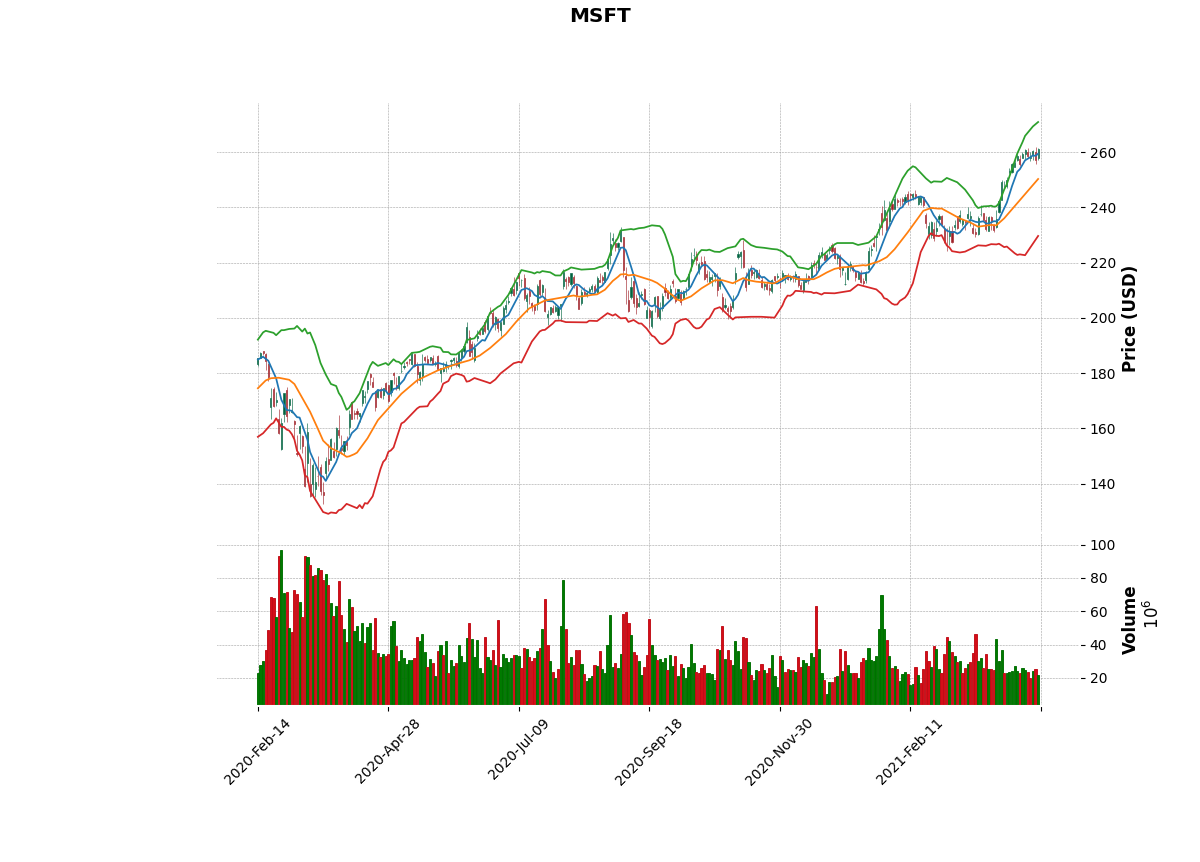

In [8]:
import mplfinance as mpf

bands_plot = pd.concat([dataset_TI_df['ma7'].tail(300), dataset_TI_df['ma21'].tail(300), 
                        dataset_TI_df['upper_band'].tail(300), dataset_TI_df['lower_band'].tail(300)], axis=1)

apd = mpf.make_addplot(bands_plot)

mpf.plot(dataset_TI_df.tail(300), type='candle', style='charles',
        title='MSFT',
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        addplot=apd
        )

In [9]:
import matplotlib.pyplot as plt

def plot_technical_indicators(dataset, last_days):
  
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)

    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    print(xmacd_)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Microsofts - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.plot(dataset['log-momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


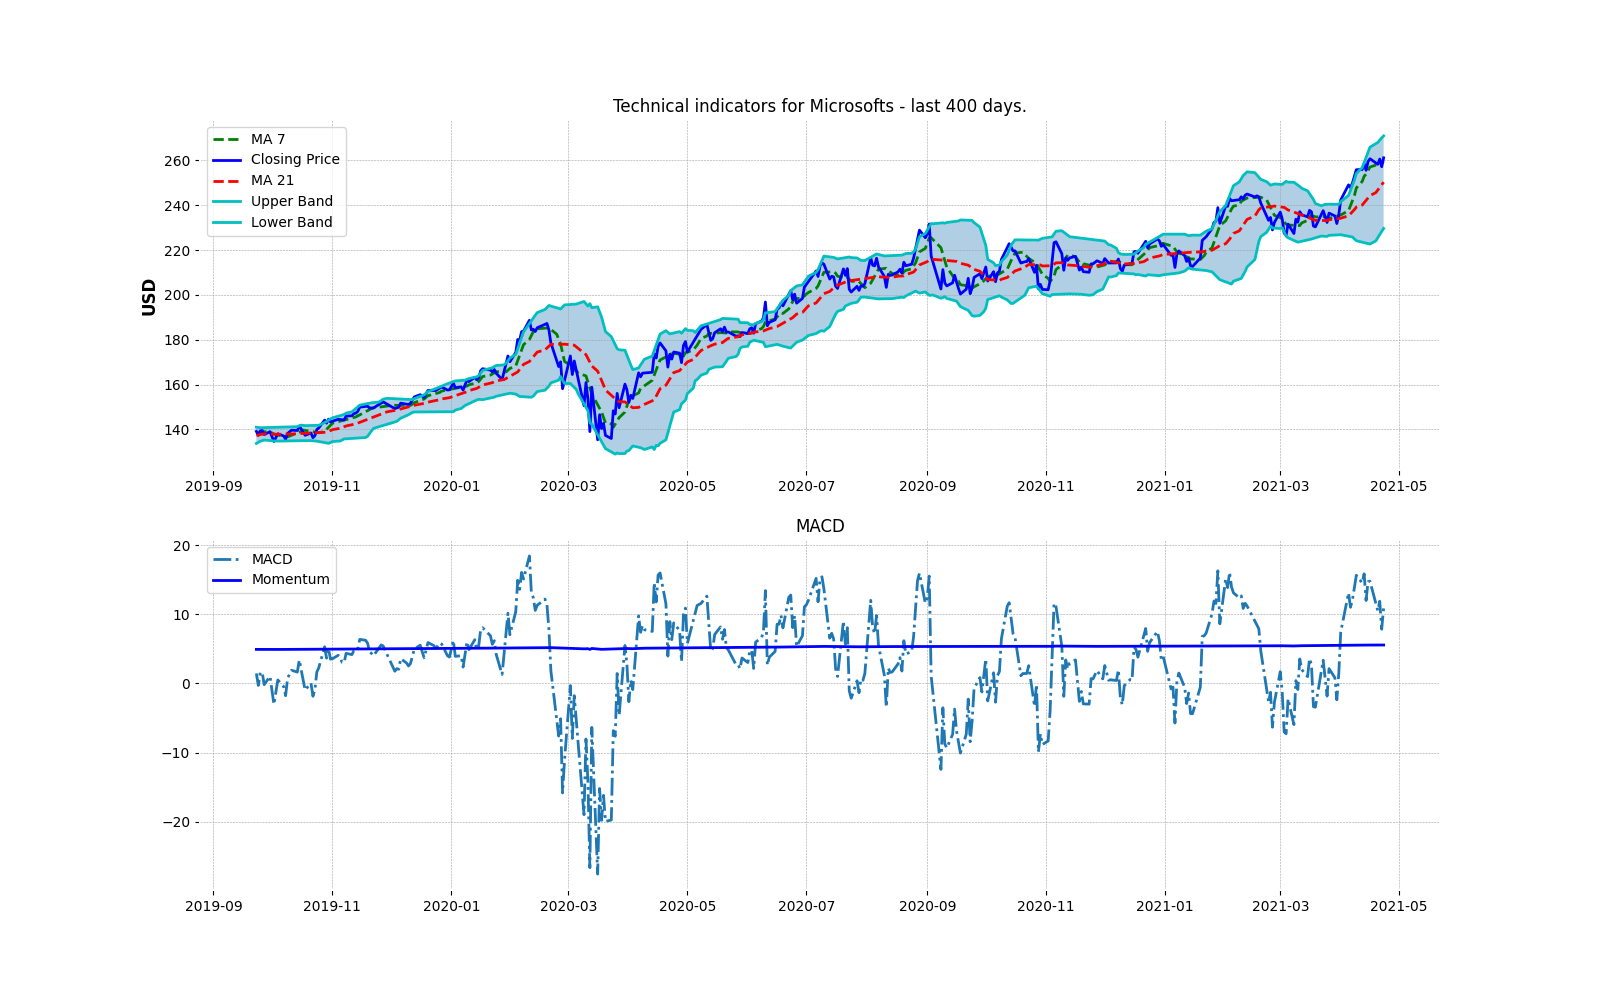

0


In [10]:
plot_technical_indicators(dataset_TI_df, 400)

In [11]:
dataset_TI_df

,open,high,low,close,volume,ma7,ma21,26ema,12ema,MACD,21sd,upper_band,lower_band,ema,momentum,log-momentum
date,,,,,,,,,,,,,,,,
1999-11-01,93.25,94.19,92.120,92.37,26630600.0,NaN,NaN,92.370000,92.370000,0.000000,NaN,NaN,NaN,92.370000,91.37,4.514917
1999-11-02,92.75,94.50,91.940,92.56,23174500.0,NaN,NaN,92.468654,92.472917,0.091346,NaN,NaN,NaN,92.512500,91.56,4.516994
1999-11-03,92.94,93.50,91.500,92.00,22258500.0,NaN,NaN,92.300271,92.288337,-0.300271,NaN,NaN,NaN,92.157692,91.00,4.510860
1999-11-04,92.31,92.75,90.310,91.75,27119700.0,NaN,NaN,92.146439,92.118405,-0.396439,NaN,NaN,NaN,91.882500,90.75,4.508108
1999-11-05,91.81,92.87,90.500,91.56,35083700.0,NaN,NaN,92.010442,91.966688,-0.450442,NaN,NaN,NaN,91.666612,90.56,4.506013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-19,260.19,261.48,257.821,258.74,23209260.0,257.831429,245.633810,246.907975,253.482620,11.832025,10.773062,267.179933,224.087686,259.147342,257.74,5.551951
2021-04-20,257.82,260.20,256.840,258.26,19722875.0,258.175714,246.962857,247.748866,254.217602,10.511134,10.511682,267.986221,225.939493,258.555781,257.26,5.550087
2021-04-21,258.94,260.68,257.250,260.58,24030383.0,258.842857,248.133810,248.699320,255.196432,11.880680,10.597496,269.328802,226.938817,259.905260,259.58,5.559065


In [12]:
#add vix data
df_vix = pd.read_csv("./data/vix-daily.csv", header=0, index_col="Date", parse_dates=True)
df_vix.index.names = ['date']
dataset_TI_df = pd.merge(dataset_TI_df, df_vix, on=["date"])
dataset_TI_df

,open,high,low,close,volume,ma7,ma21,26ema,12ema,MACD,21sd,upper_band,lower_band,ema,momentum,log-momentum,VIX Open,VIX High,VIX Low,VIX Close
date,,,,,,,,,,,,,,,,,,,,
2004-01-02,27.58,27.7700,27.3300,27.45,44487700.0,27.314286,26.871429,26.877265,27.187778,0.572735,0.538110,27.947649,25.795208,27.434179,26.45,3.275256,17.96,18.68,17.54,18.22
2004-01-05,27.73,28.1800,27.7200,28.14,67333700.0,27.455714,26.989048,26.970801,27.334274,1.169199,0.532287,28.053621,25.924474,27.904726,27.14,3.301009,18.45,18.49,17.44,17.49
2004-01-06,28.19,28.2800,28.0700,28.24,46950800.0,27.627143,27.086190,27.064815,27.473616,1.175185,0.566158,28.218506,25.953875,28.128242,27.24,3.304686,17.66,17.67,16.19,16.73
2004-01-07,28.17,28.3100,28.0100,28.21,54298200.0,27.770000,27.192381,27.149644,27.586906,1.060356,0.557368,28.307117,26.077645,28.182747,27.21,3.303585,16.72,16.75,15.50,15.50
2004-01-08,28.39,28.4800,28.0000,28.16,58810800.0,27.870000,27.283810,27.224485,27.675075,0.935515,0.550767,28.385344,26.182275,28.167582,27.16,3.301745,15.42,15.68,15.32,15.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,227.00,228.7000,224.3100,225.53,28774156.0,220.764286,214.353333,213.899127,218.731093,11.630873,6.508163,227.369659,201.337008,226.126561,224.53,5.414009,23.91,26.50,21.77,26.41
2020-09-01,225.51,227.4500,224.4300,227.27,25791235.0,222.800000,214.864286,214.889562,220.044771,12.380438,7.084137,229.032560,200.696012,226.888854,226.27,5.421729,25.86,26.59,25.02,26.12
2020-09-02,227.97,232.8600,227.3500,231.65,34080839.0,225.365714,215.738571,216.131076,221.830191,15.518924,7.959051,231.656673,199.820469,230.062951,230.65,5.440901,26.01,27.07,25.53,26.57


In [22]:
add_stock_date("AAPL", dataset_TI_df)

                  Open        High         Low       Close     Volume  \
Date                                                                    
2003-01-02    0.220879    0.229492    0.220724    0.227646  181428800   
2003-01-03    0.227646    0.229646    0.224416    0.229184  147453600   
2003-01-06    0.231184    0.236567    0.228876    0.229184  390532800   
2003-01-07    0.227492    0.230722    0.222570    0.228416  342344800   
2003-01-08    0.224262    0.226262    0.222109    0.223800  229644800   
...                ...         ...         ...         ...        ...   
2021-04-26  134.830002  135.059998  133.559998  134.720001   66905100   
2021-04-27  135.009995  135.410004  134.110001  134.389999   66015800   
2021-04-28  134.309998  135.020004  133.080002  133.580002  107760100   
2021-04-29  136.470001  137.070007  132.449997  133.479996  151101000   
2021-04-30  131.779999  133.559998  131.070007  131.460007  109713200   

            Dividends  Stock Splits  
Date        

/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,open,high,low,close,volume,ma7,ma21,26ema,12ema,MACD,...,lower_band,ema,momentum,log-momentum,VIX Open,VIX High,VIX Low,VIX Close,AAPL_close_x,AAPL_close_y
date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,27.58,27.7700,27.3300,27.45,44487700.0,27.314286,26.871429,26.877265,27.187778,0.572735,...,25.795208,27.434179,26.45,3.275256,17.96,18.68,17.54,18.22,21.28,0.327318
2004-01-05,27.73,28.1800,27.7200,28.14,67333700.0,27.455714,26.989048,26.970801,27.334274,1.169199,...,25.924474,27.904726,27.14,3.301009,18.45,18.49,17.44,17.49,22.17,0.341008
2004-01-06,28.19,28.2800,28.0700,28.24,46950800.0,27.627143,27.086190,27.064815,27.473616,1.175185,...,25.953875,28.128242,27.24,3.304686,17.66,17.67,16.19,16.73,22.09,0.339777
2004-01-07,28.17,28.3100,28.0100,28.21,54298200.0,27.770000,27.192381,27.149644,27.586906,1.060356,...,26.077645,28.182747,27.21,3.303585,16.72,16.75,15.50,15.50,22.59,0.347468
2004-01-08,28.39,28.4800,28.0000,28.16,58810800.0,27.870000,27.283810,27.224485,27.675075,0.935515,...,26.182275,28.167582,27.16,3.301745,15.42,15.68,15.32,15.61,23.36,0.359312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,227.00,228.7000,224.3100,225.53,28774156.0,220.764286,214.353333,213.899127,218.731093,11.630873,...,201.337008,226.126561,224.53,5.414009,23.91,26.50,21.77,26.41,129.04,128.625549
2020-09-01,225.51,227.4500,224.4300,227.27,25791235.0,222.800000,214.864286,214.889562,220.044771,12.380438,...,200.696012,226.888854,226.27,5.421729,25.86,26.59,25.02,26.12,134.18,133.749039
2020-09-02,227.97,232.8600,227.3500,231.65,34080839.0,225.365714,215.738571,216.131076,221.830191,15.518924,...,199.820469,230.062951,230.65,5.440901,26.01,27.07,25.53,26.57,131.40,130.977966


In [15]:
#add similar company data
df_AAPL = pd.read_csv("./data/AAPL_daily.csv", header=0, index_col="date", parse_dates=True)
df_AAPL_close = df_AAPL[['4. close']]
df_AAPL_close.rename(columns={"4. close": "AAPL_close"}, inplace = True)
dataset_TI_df = pd.merge(dataset_TI_df, df_AAPL_close, on=["date"])
dataset_TI_df

/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,open,high,low,close,volume,ma7,ma21,26ema,12ema,MACD,...,upper_band,lower_band,ema,momentum,log-momentum,VIX Open,VIX High,VIX Low,VIX Close,AAPL_close
date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,27.58,27.7700,27.3300,27.45,44487700.0,27.314286,26.871429,26.877265,27.187778,0.572735,...,27.947649,25.795208,27.434179,26.45,3.275256,17.96,18.68,17.54,18.22,21.28
2004-01-05,27.73,28.1800,27.7200,28.14,67333700.0,27.455714,26.989048,26.970801,27.334274,1.169199,...,28.053621,25.924474,27.904726,27.14,3.301009,18.45,18.49,17.44,17.49,22.17
2004-01-06,28.19,28.2800,28.0700,28.24,46950800.0,27.627143,27.086190,27.064815,27.473616,1.175185,...,28.218506,25.953875,28.128242,27.24,3.304686,17.66,17.67,16.19,16.73,22.09
2004-01-07,28.17,28.3100,28.0100,28.21,54298200.0,27.770000,27.192381,27.149644,27.586906,1.060356,...,28.307117,26.077645,28.182747,27.21,3.303585,16.72,16.75,15.50,15.50,22.59
2004-01-08,28.39,28.4800,28.0000,28.16,58810800.0,27.870000,27.283810,27.224485,27.675075,0.935515,...,28.385344,26.182275,28.167582,27.16,3.301745,15.42,15.68,15.32,15.61,23.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,227.00,228.7000,224.3100,225.53,28774156.0,220.764286,214.353333,213.899127,218.731093,11.630873,...,227.369659,201.337008,226.126561,224.53,5.414009,23.91,26.50,21.77,26.41,129.04
2020-09-01,225.51,227.4500,224.4300,227.27,25791235.0,222.800000,214.864286,214.889562,220.044771,12.380438,...,229.032560,200.696012,226.888854,226.27,5.421729,25.86,26.59,25.02,26.12,134.18
2020-09-02,227.97,232.8600,227.3500,231.65,34080839.0,225.365714,215.738571,216.131076,221.830191,15.518924,...,231.656673,199.820469,230.062951,230.65,5.440901,26.01,27.07,25.53,26.57,131.40


In [16]:
df_FB = pd.read_csv("./data/FB-daily.csv", header=0, index_col="Date", parse_dates=True)
df_AMZN = pd.read_csv("./data/AMZN-daily.csv", header=0, index_col="Date", parse_dates=True)
df_GOOG = pd.read_csv("./data/GOOG-daily.csv", header=0, index_col="Date", parse_dates=True)

FileNotFoundError: [Errno 2] No such file or directory: './data/FB-daily.csv'